In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from termcolor import colored

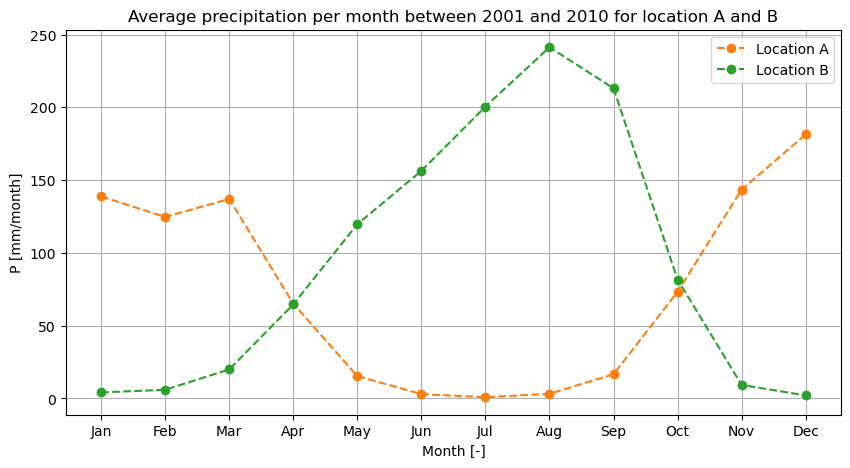

In [7]:
"""Precipitation data"""

t = 120
t_day = 86400

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly.nc' , engine = 'netcdf4')

P_mean = np.zeros(t)
avg = np.zeros(12)

for i in range(len(P_mean)):
    P_mean[i] = Prec_monthly_2001_2010.pr[i , 204:212 , 134*2:138*2].mean() * t_day * dpm[i]

"""Precipitation data WA"""

Prec_monthly_2001_2010_WA = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_WA.nc' , engine = 'netcdf4')

P_mean_WA = np.zeros(t)
avg_WA = np.zeros(12)


for i in range(len(P_mean_WA)):
    P_mean_WA[i] = Prec_monthly_2001_2010_WA.pr[i].mean() * t_day * dpm[i]

from collections import defaultdict

# Create an empty dictionary to store the monthly averages
monthly_averages = defaultdict(list)

# loop through the data and group the values by month
for i, value in enumerate(P_mean):
    month = (i % 12) + 1
    monthly_averages[month].append(value)

# calculate the mean for each month
for month, values in monthly_averages.items():
    avg[month - 1] = sum(values) / len(values)
    
    
print()

# Create an empty dictionary to store the monthly averages
monthly_averages = defaultdict(list)

# loop through the data and group the values by month
for i, value in enumerate(P_mean_WA):
    month = (i % 12) + 1
    monthly_averages[month].append(value)

# calculate the mean for each month
for month, values in monthly_averages.items():
    avg_WA[month -1] = sum(values) / len(values)

plt.figure(figsize = (10 , 5 ))
#plt.plot(P_mean/ET_mean_LFE , label = 'P/ET per month LFE')
plt.plot(avg , label = 'Location A' , color = 'C1' , marker = 'o' , linestyle = 'dashed')
plt.plot(avg_WA , label = 'Location B' , color = 'C2' , marker = 'o' , linestyle = 'dashed')

plt.grid()
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.ylabel('P [mm/month]')
plt.xlabel('Month [-]')
plt.title('Average precipitation per month between 2001 and 2010 for location A and B')
plt.legend();

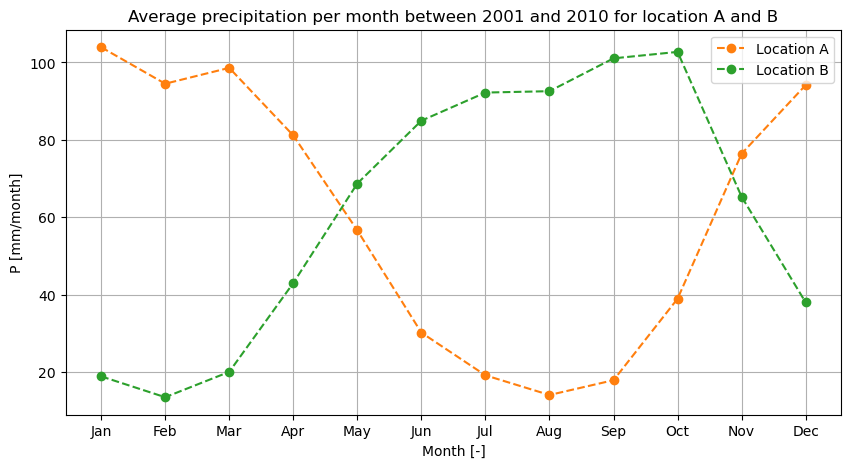

In [9]:
"""Evaporation"""

EB = np.array([103.92560451,  94.49179368,  98.59213805,  81.12164497,
        56.59054507,  30.16543204,  19.1360018 ,  14.04959229,
        17.87133917,  38.92692444,  76.41327131,  94.14777718])

WA = np.array([ 18.86786578,  13.47371537,  20.02648044,  42.98215592,
        68.70464069,  84.94127154,  92.20811162,  92.56385038,
       101.05043006, 102.71841719,  65.27272654,  37.98183998])


plt.figure(figsize = (10 , 5 ))
plt.plot(EB , label = 'Location A' , color = 'C1' , marker = 'o' , linestyle = 'dashed')
plt.plot(WA , label = 'Location B' , color = 'C2' , marker = 'o' , linestyle = 'dashed')

plt.grid()
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.ylabel('E [mm/month]')
plt.xlabel('Month [-]')
plt.title('Average evaporation per month between 2001 and 2010 for location A and B')
plt.legend();

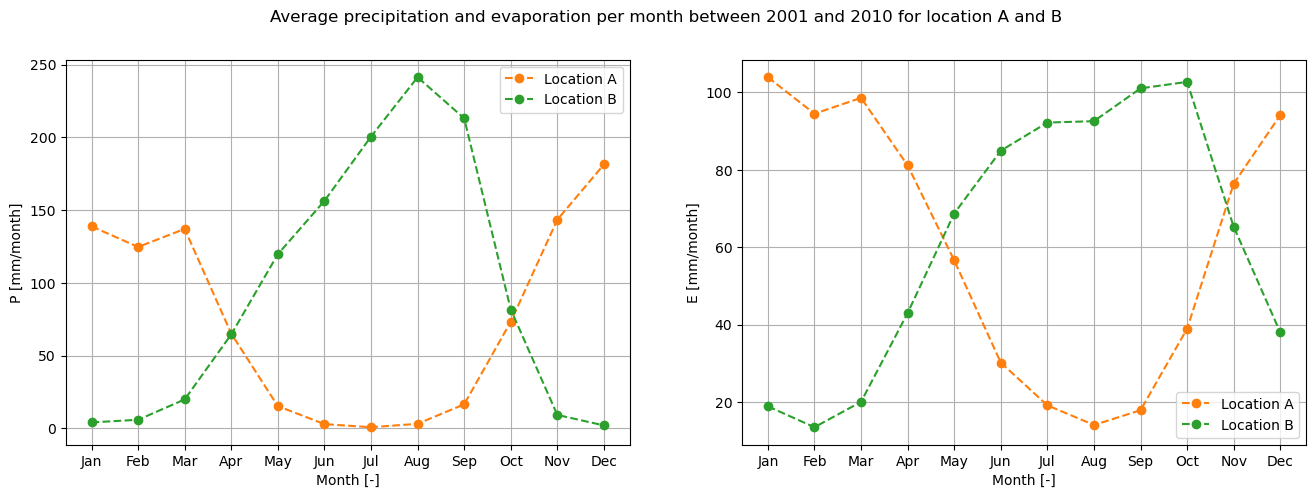

In [13]:
plt.figure(figsize = (16 , 5 ))
plt.suptitle('Average precipitation and evaporation per month between 2001 and 2010 for location A and B')
plt.subplot(121)
plt.plot(avg , label = 'Location A' , color = 'C1' , marker = 'o' , linestyle = 'dashed')
plt.plot(avg_WA , label = 'Location B' , color = 'C2' , marker = 'o' , linestyle = 'dashed')

plt.grid()
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.ylabel('P [mm/month]')
plt.xlabel('Month [-]')
plt.legend()

plt.subplot(122)
plt.plot(EB , label = 'Location A' , color = 'C1' , marker = 'o' , linestyle = 'dashed')
plt.plot(WA , label = 'Location B' , color = 'C2' , marker = 'o' , linestyle = 'dashed')

plt.grid()
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.ylabel('E [mm/month]')
plt.xlabel('Month [-]')

plt.legend();